# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [2]:
import pandas as pd

df = pd.read_csv("advertising.csv")
display(df)

df.corr()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

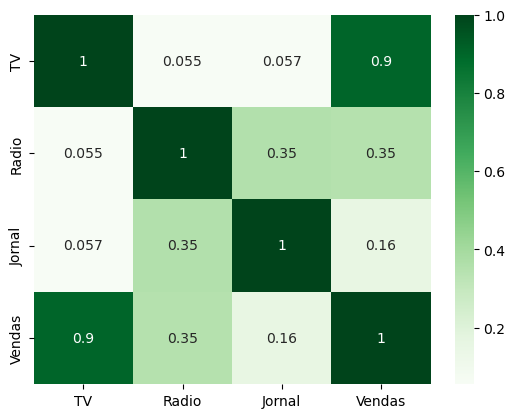

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap="Greens", annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [39]:
x = df.drop("Vendas", axis=1)
y = df["Vendas"]
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, random_state=1)
Lin_Reg = LinearRegression()
Lin_Reg.fit(x_treino, y_treino)
avr = RandomForestRegressor()
avr.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [40]:
Predição_Lin_Reg = Lin_Reg.predict(x_teste)
Predição_avr = avr.predict(x_teste)

r2_Lin_Reg = metrics.r2_score(y_teste, Predição_Lin_Reg)
r2_avr = metrics.r2_score(y_teste, Predição_avr)
print(r2_Lin_Reg)
print(r2_avr)

0.9071151423684273
0.9635177548757504


Visualização Gráfica das Previsões

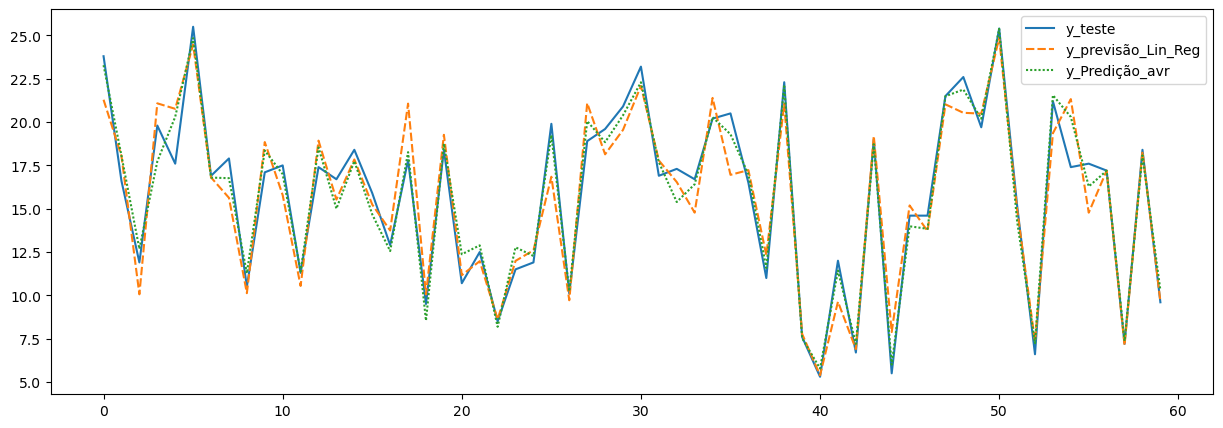

,y_teste,y_previsão_Lin_Reg,y_Predição_avr
0,23.8,21.288161,23.283
1,16.6,18.042132,18.055
2,11.9,10.059590,12.677
3,19.8,21.082241,17.728
4,17.6,20.764760,20.304
5,25.5,24.471874,24.844
6,16.9,16.806436,16.796
7,17.9,15.628857,16.762
8,10.5,10.124799,11.274
9,17.1,18.846019,18.360


In [43]:
df_resultado = pd.DataFrame()
df_resultado['y_teste'] = y_teste
df_resultado['y_previsão_Lin_Reg'] = Predição_Lin_Reg
df_resultado['y_Predição_avr'] = Predição_avr
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

#### Como fazer uma nova previsão?

In [44]:
nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [45]:
previsão = avr.predict(nova_tabela)
display(previsão)

array([ 7.47 ,  8.596, 19.779])